In [1]:
import pandas as pd
from scipy import fft
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot as plt

In [2]:
from ica import ica1

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,id,trial,stimuli,sample,class,AF1,AF2,AF7,AF8,...,PO8,POZ,PZ,T7,T8,TP7,TP8,X,Y,nd
0,0,co2a0000379.rd,61,S2 match,0,1,-15.747,-13.397,-19.552,-20.905,...,-1.343,-0.244,3.194,-17.344,17.253,-7.874,1.709,-27.618,-19.725,-10.193
1,1,co2a0000379.rd,61,S2 match,1,1,-17.700,-16.815,-29.317,-26.276,...,-0.854,-0.244,2.706,-14.414,12.858,-4.944,-1.221,-31.036,-24.607,-6.775
2,2,co2a0000379.rd,61,S2 match,2,1,-17.700,-17.792,-36.153,-25.787,...,1.099,1.221,3.194,-11.485,-0.814,-3.967,-3.662,-30.548,-27.049,-2.380
3,3,co2a0000379.rd,61,S2 match,3,1,-16.724,-16.327,-38.595,-19.928,...,3.540,3.174,4.171,-10.020,-13.509,-6.409,-3.662,-25.665,-27.049,-0.427
4,4,co2a0000379.rd,61,S2 match,4,1,-15.747,-13.397,-35.665,-14.069,...,5.493,3.662,4.659,-9.532,-17.904,-10.315,-1.221,-20.294,-24.607,-2.380


In [19]:
for i,mini_df in tqdm(df.groupby(['id','trial','stimuli','class'])):
    img = mini_df.values[:,6:].astype(float)
    break

  0%|          | 0/11057 [00:01<?, ?it/s]


In [20]:
A,S,W = ica1(img.T, 64)

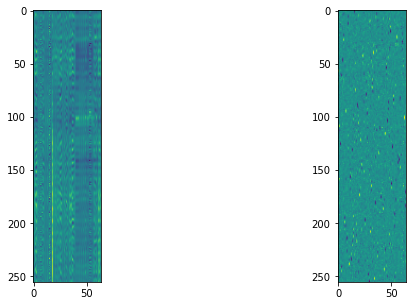

In [23]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(S.T)

In [26]:
!mkdir /sise/liorrk-group/OrDanOfir/eeg/data/images_fft

mkdir: cannot create directory ‘/sise/liorrk-group/OrDanOfir/eeg/data/images_fft’: File exists


In [27]:
names = {}
for i,row in enumerate(list(set(df['stimuli']))):
    names[row] = i

In [28]:
def my_fft(x,num=7):
    v_fft = fft.fft(x)
    v_fft[num+1:-num]=0
    v_fft[0]=0
    x_ds = fft.ifft(v_fft)
    return abs(x_ds)

In [1]:
df_list = []
for i,mini_df in tqdm(df.groupby(['id','trial','stimuli','class'])):
    n = i[2].replace(" ","")
    img = mini_df.values[:,6:].astype(float)
    new_img = np.zeros_like(img)
    A,S,W = ica1(img.T, 64)
    S = S.T
    for row in range(img.shape[1]):
        new_img[:,row] = my_fft(img[:,row])
    path = f"/sise/liorrk-group/OrDanOfir/eeg/data/images_fft/{i[0]}_{i[1]}_{n}_{i[3]}.npz"
    new_img = np.stack([img,S,new_img],-1)
    np.savez_compressed(path,img=new_img,label=i[3])
    df_list.append(pd.DataFrame([[path,i[0],i[1],i[2],i[3]]],columns=['path','id','trial','stimuli','class']))
pd.concat(df_list).to_csv("/sise/liorrk-group/OrDanOfir/eeg/data/img_train_fft.csv")

In [2]:
plt.imshow(new_img[:,:,0])

In [ ]:
scaler = StandardScaler()
scaler.fit(X_DS)
new_x = scaler.transform(X_DS)

In [13]:
np.savez_compressed("/sise/liorrk-group/OrDanOfir/eeg/data/data.npz",x_dn = np.array(X_DS),y=np.array(Y),c = np.array(C) , x = np.array(X) , fft = np.array(FFT))

In [268]:
pca = PCA(n_components=2)

/home/kaor/.conda/envs/openmmlab/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/kaor/.conda/envs/openmmlab/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/kaor/.conda/envs/openmmlab/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/kaor/.conda/envs/openmmlab/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/kaor/.conda/envs/openmmlab/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, fl

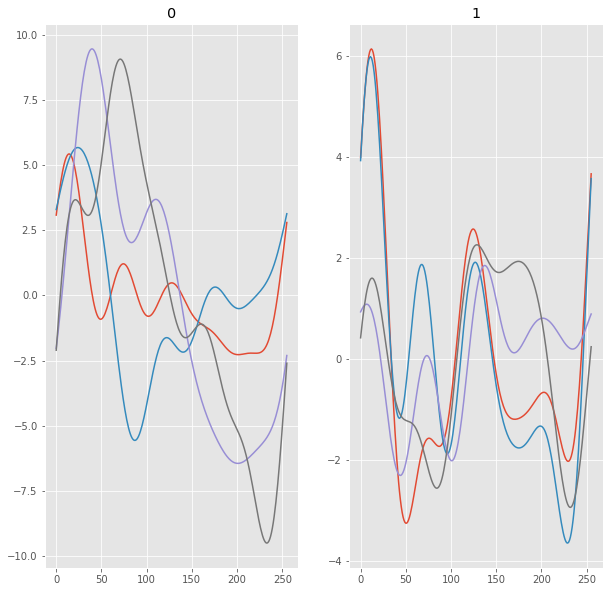

In [277]:
plt.figure(figsize=[10,10])
plt.subplot(121)
for ii,ids in enumerate(list(set(df['id']))):
    df_i = df[df['id']==ids]
    if df_i['class'].values[0]==1:
        continue
    z = []
    for i,mini_df in df_i[df_i['stimuli']=='S2 match'].groupby("trial"):
        v = mini_df.POZ.values
        f = fft.fft(v)
        f[0]=0
        v_fft = fft.fftshift(f)
        s = len(v_fft)//2
        v_fft[0:s-5]=0
        v_fft[s+5:]=0
        v_ds = fft.ifft(fft.ifftshift(v_fft))
    #     plt.plot(v_ds)
        z.append(v_ds)
    plt.plot(np.array(z).mean(0))
    if ii>5:
        break
plt.title(0)
plt.subplot(122)
for ii,ids in enumerate(list(set(df['id']))):
    df_i = df[df['id']==ids]
    if df_i['class'].values[0]==0:
        continue
    z = []
    for i,mini_df in df_i[df_i['stimuli']=='S2 match'].groupby("trial"):
        v = mini_df.POZ.values
        f = fft.fft(v)
        f[0]=0
        v_fft = fft.fftshift(f)
        s = len(v_fft)//2
        v_fft[0:s-5]=0
        v_fft[s+5:]=0
        v_ds = fft.ifft(fft.ifftshift(v_fft))
    #     plt.plot(v_ds)
        z.append(v_ds)
    plt.plot(np.array(z).mean(0))
    if ii>5:
        break
plt.title(1)
plt.show()

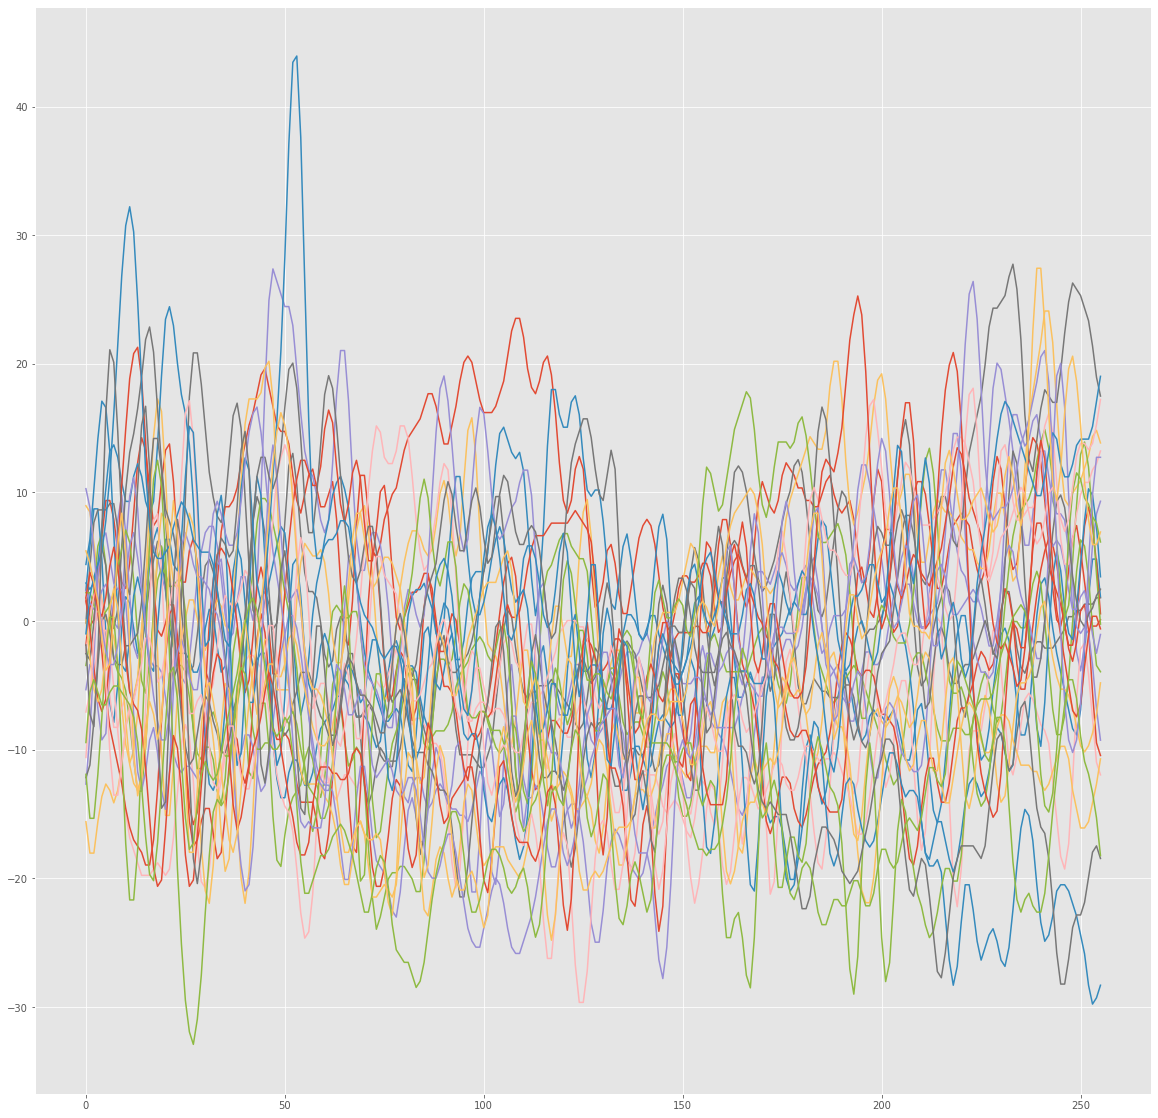

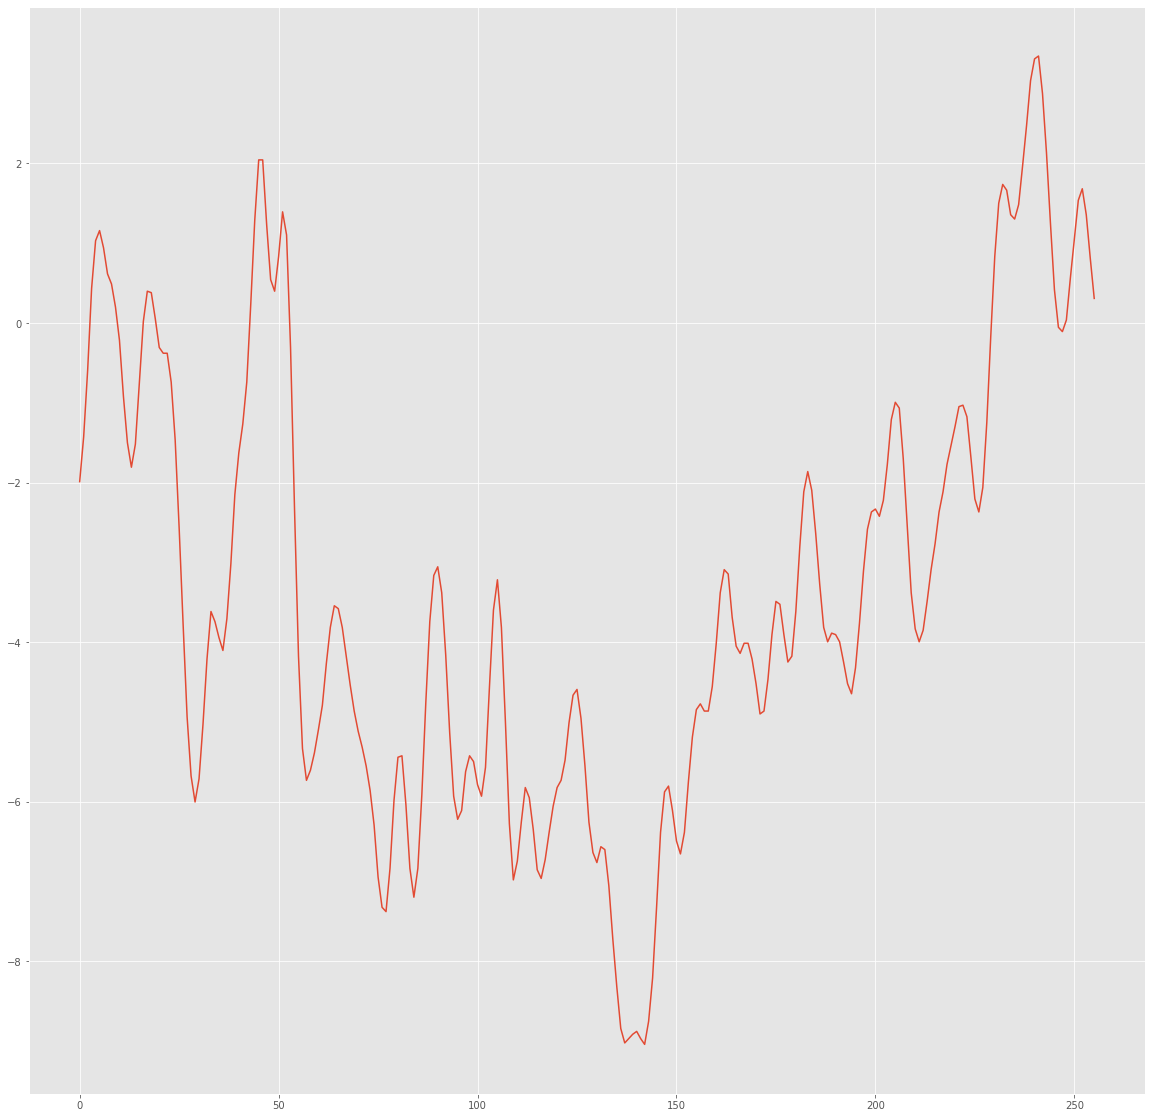

In [245]:
plt.figure(figsize=[20,20])
z = []
for i,mini_df in df_i[df_i['stimuli']=='S2 match'].groupby("trial"):
    v = mini_df.AFZ.values
    plt.plot(v)
    z.append(v)
plt.show()
plt.figure(figsize=[20,20])
plt.plot(np.array(z).mean(0))

In [2]:
import csv    
import gzip
import os
import glob
import pickle
import re
import sys
import time
import multiprocessing as mp
import platform
from tqdm import tnrange, tqdm_notebook
import numpy as np
from IPython.core.pylabtools import figsize
from IPython.display import clear_output
import pandas as pd
import cv2
%matplotlib notebook            
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [49]:
set(df.stimuli)

{'S1 obj', 'S2 match', 'S2 match err', 'S2 nomatch', 'S2 nomatch err'}

In [179]:
df_s2 = df[df.stimuli == 'S2 match']
df_s2

,Unnamed: 0,id,trial,stimuli,sample,class,AF1,AF2,AF7,AF8,...,PO8,POZ,PZ,T7,T8,TP7,TP8,X,Y,nd
0,0,co2a0000379.rd,61,S2 match,0,1,-15.747,-13.397,-19.552,-20.905,...,-1.343,-0.244,3.194,-17.344,17.253,-7.874,1.709,-27.618,-19.725,-10.193
1,1,co2a0000379.rd,61,S2 match,1,1,-17.700,-16.815,-29.317,-26.276,...,-0.854,-0.244,2.706,-14.414,12.858,-4.944,-1.221,-31.036,-24.607,-6.775
2,2,co2a0000379.rd,61,S2 match,2,1,-17.700,-17.792,-36.153,-25.787,...,1.099,1.221,3.194,-11.485,-0.814,-3.967,-3.662,-30.548,-27.049,-2.380
3,3,co2a0000379.rd,61,S2 match,3,1,-16.724,-16.327,-38.595,-19.928,...,3.540,3.174,4.171,-10.020,-13.509,-6.409,-3.662,-25.665,-27.049,-0.427
4,4,co2a0000379.rd,61,S2 match,4,1,-15.747,-13.397,-35.665,-14.069,...,5.493,3.662,4.659,-9.532,-17.904,-10.315,-1.221,-20.294,-24.607,-2.380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830075,2830075,co2c0000374.rd,85,S2 match,251,0,-10.356,-11.698,13.377,3.550,...,14.679,-0.031,6.480,14.618,-3.937,0.356,-1.088,5.219,4.659,4.130
2830076,2830076,co2c0000374.rd,85,S2 match,252,0,-7.914,-10.234,18.748,6.968,...,16.144,0.946,6.480,18.524,-0.031,4.751,1.841,12.543,10.030,9.989
2830077,2830077,co2c0000374.rd,85,S2 match,253,0,-4.008,-7.304,21.189,13.316,...,16.144,-0.031,5.015,23.407,1.923,7.680,3.306,19.867,16.866,15.849
2830078,2830078,co2c0000374.rd,85,S2 match,254,0,-0.102,-2.909,22.654,20.152,...,16.632,-2.472,3.062,29.755,2.411,10.610,4.283,26.703,22.725,21.708


In [211]:
df61 = df_s2[df_s2['trial']==61]
df1 = df61[df61['id']=='co2a0000379.rd']
df2 = df61[df61['id']=='co2a0000436.rd']

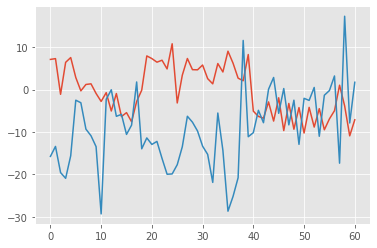

In [212]:
plt.plot(df2[df2['sample']==0].values[0,6:-3])
plt.plot(df1[df1['sample']==0].values[0,6:-3])

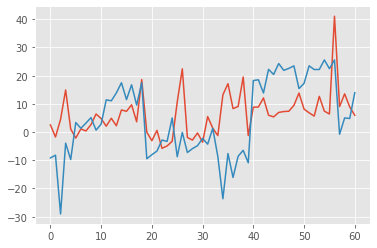

In [220]:
df70 = df_s2[df_s2['trial']==3]
df1 = df70[df70['id']=='co2a0000379.rd']
df2 = df70[df70['id']=='co2a0000436.rd']
# plt.plot(df2[df2['sample']==0].values[0,6:-3])
plt.plot(df1[df1['sample']==128].values[0,6:-3])
df70 = df_s2[df_s2['trial']==17]
df1 = df70[df70['id']=='co2a0000379.rd']
df2 = df70[df70['id']=='co2a0000436.rd']
# plt.plot(df2[df2['sample']==0].values[0,6:-3])
plt.plot(df1[df1['sample']==128].values[0,6:-3])

In [221]:
df1

,Unnamed: 0,id,trial,stimuli,sample,class,AF1,AF2,AF7,AF8,...,PO8,POZ,PZ,T7,T8,TP7,TP8,X,Y,nd
1545472,1545472,co2a0000379.rd,17,S2 match,0,1,-3.774,-6.246,1.261,-11.241,...,-2.238,-2.421,-3.204,-1.261,8.433,-3.967,5.188,-9.715,-3.428,-0.142
1545473,1545473,co2a0000379.rd,17,S2 match,1,1,-2.309,-4.293,-1.180,-7.334,...,-0.285,0.997,-2.716,0.692,5.992,0.916,1.770,-6.297,-1.475,11.576
1545474,1545474,co2a0000379.rd,17,S2 match,2,1,-3.286,-3.805,-5.086,-3.916,...,-0.285,3.927,-1.740,2.157,4.527,6.775,0.793,-4.832,-0.987,17.924
1545475,1545475,co2a0000379.rd,17,S2 match,3,1,-6.704,-5.758,-7.039,-2.452,...,-1.261,4.903,-0.275,3.133,2.085,10.193,2.747,-7.273,-1.475,18.412
1545476,1545476,co2a0000379.rd,17,S2 match,4,1,-10.122,-7.222,-6.063,-4.405,...,-2.726,4.415,0.702,2.645,-2.797,9.705,5.188,-11.180,-2.452,14.506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545723,1545723,co2a0000379.rd,17,S2 match,251,1,-1.333,-2.340,18.840,-2.940,...,2.645,-0.956,16.815,-9.562,-5.239,-14.221,-4.089,4.445,-4.405,-4.537
1545724,1545724,co2a0000379.rd,17,S2 match,252,1,3.550,0.590,5.168,-6.846,...,5.575,0.020,16.815,-8.586,3.550,-16.663,-4.578,9.328,-3.916,-5.025
1545725,1545725,co2a0000379.rd,17,S2 match,253,1,6.968,4.985,-5.086,-0.010,...,8.016,0.020,15.839,-6.144,14.781,-15.686,-2.625,17.141,-0.498,-6.002
1545726,1545726,co2a0000379.rd,17,S2 match,254,1,8.433,7.914,-5.575,11.709,...,8.993,0.020,15.350,-3.215,20.152,-10.803,1.282,24.953,4.873,-6.978


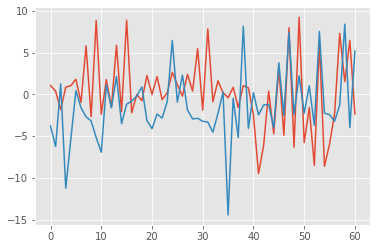

In [217]:
120X64X256 -> SW 32X32X32 stride 4

In [215]:
set(df_s2['trial'])

{3,
 9,
 11,
 17,
 23,
 25,
 27,
 37,
 41,
 47,
 51,
 55,
 61,
 65,
 71,
 75,
 77,
 79,
 81,
 85,
 91,
 97,
 99,
 101,
 105,
 107,
 109,
 113,
 117,
 119}

In [107]:
chan_names = list(df.columns[6:])

In [108]:
al_df = df_s2[df_s2['class']==1]
co_df = df_s2[df_s2['class']==0]
al_df

,Unnamed: 0,id,trial,stimuli,sample,class,AF1,AF2,AF7,AF8,...,PO8,POZ,PZ,T7,T8,TP7,TP8,X,Y,nd
0,0,co2a0000379.rd,61,S2 match,0,1,-15.747,-13.397,-19.552,-20.905,...,-1.343,-0.244,3.194,-17.344,17.253,-7.874,1.709,-27.618,-19.725,-10.193
1,1,co2a0000379.rd,61,S2 match,1,1,-17.700,-16.815,-29.317,-26.276,...,-0.854,-0.244,2.706,-14.414,12.858,-4.944,-1.221,-31.036,-24.607,-6.775
2,2,co2a0000379.rd,61,S2 match,2,1,-17.700,-17.792,-36.153,-25.787,...,1.099,1.221,3.194,-11.485,-0.814,-3.967,-3.662,-30.548,-27.049,-2.380
3,3,co2a0000379.rd,61,S2 match,3,1,-16.724,-16.327,-38.595,-19.928,...,3.540,3.174,4.171,-10.020,-13.509,-6.409,-3.662,-25.665,-27.049,-0.427
4,4,co2a0000379.rd,61,S2 match,4,1,-15.747,-13.397,-35.665,-14.069,...,5.493,3.662,4.659,-9.532,-17.904,-10.315,-1.221,-20.294,-24.607,-2.380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829563,2829563,co2a0000409.rd,101,S2 match,251,1,14.425,22.858,8.698,37.730,...,13.458,23.092,23.244,18.880,27.924,15.004,18.361,22.319,23.315,23.142
2829564,2829564,co2a0000409.rd,101,S2 match,252,1,11.983,20.905,10.651,36.753,...,17.365,25.533,25.197,19.368,30.365,16.958,21.291,19.877,22.827,22.166
2829565,2829565,co2a0000409.rd,101,S2 match,253,1,9.542,18.463,12.604,35.288,...,20.782,27.974,27.150,21.322,30.365,19.399,23.733,17.924,21.362,21.189
2829566,2829566,co2a0000409.rd,101,S2 match,254,1,8.077,16.998,13.092,33.824,...,24.200,30.416,28.615,23.275,27.924,22.817,24.709,15.971,18.921,18.748


In [109]:
def make_matrix(df_obj,trial_num=61):
    """
        This function returns voltage values in the form of matrix with shape
        64 X 256, corresponding to 64 channels.
        Args:
        df_obj: Dataframe object containing all the trial information
        trial_num: The trial number for which the plot need to be made
        Return:
        z with shape (64,256) containing the voltages for the trial
    """
    z = []
    for index,m in df_obj.groupby("trial"):
        z.append(m[chan_names].values)
    z = np.array(z).mean(0)
    return z.reshape(64,256)

def make_surface_plot(X,Y,Z_al,Z_co,figtit):
    """
    Make surface plots with a colormap representing
    the voltage values
    """
    fig = plt.figure()
    #fig.colorbar(surf1,shrink=0.5, aspect=5)
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    X, Y = np.meshgrid(X, Y)
    surf = ax.plot_surface(X,Y, Z_al, cmap='RdBu_r',
                           linewidth=0, antialiased=False)
    ax.set_xlabel('epoch')
    ax.set_ylabel('channels')
    ax.set_zlabel('Voltages(micro volts)')
    ax.text2D(0.05,0.95, "Alcoholic "+figtit,transform=ax.transAxes)

    #fig.colorbar(surf, shrink=0.5, aspect=5)

    ax.view_init(elev=10., azim=250)

    ax1 = fig.add_subplot(1, 2, 2, projection='3d')
    
    surf1 = ax1.plot_surface(X,Y, Z_co, cmap='RdBu_r',
                           linewidth=0, antialiased=False)
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('channels')
    ax1.set_zlabel('Voltages(micro volts)')
    ax1.text2D(0.05,0.95, "Control "+figtit,transform=ax1.transAxes)
    ax1.view_init(elev=10., azim=250)
    #fig.colorbar(surf1,shrink=0.5, aspect=5)
    cax = fig.add_axes([0.49, 0.1, 0.03, 0.8])
    fig.colorbar(surf1,cax=cax)
    fig.set_size_inches(20,8)
    plt.show()

In [110]:
al_idx = list(set(al_df['id'].values))
co_idx = list(set(co_df['id'].values))

In [111]:
df_obj = al_df[al_df['id'] == al_idx[row]]
for index,m in df_obj.groupby(["trial"]):
    break

In [112]:
# m

/home/kaor/.conda/envs/openmmlab/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


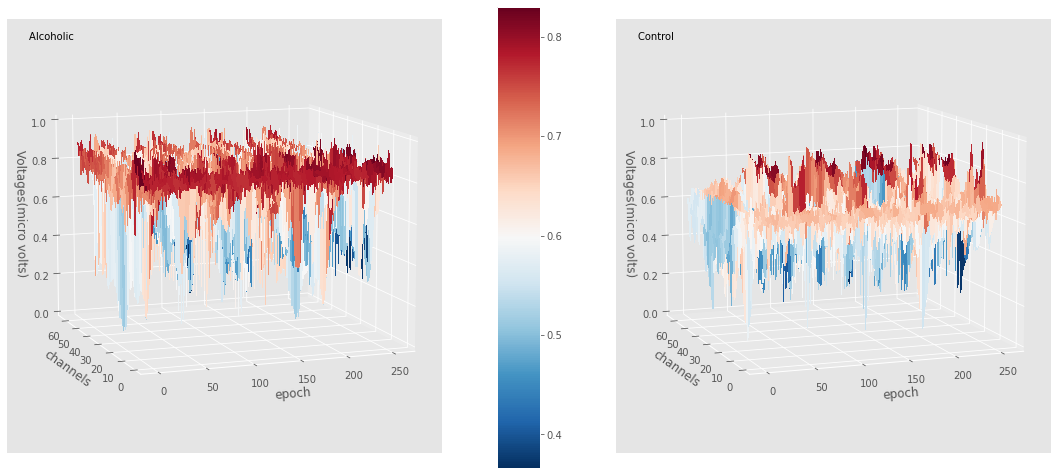

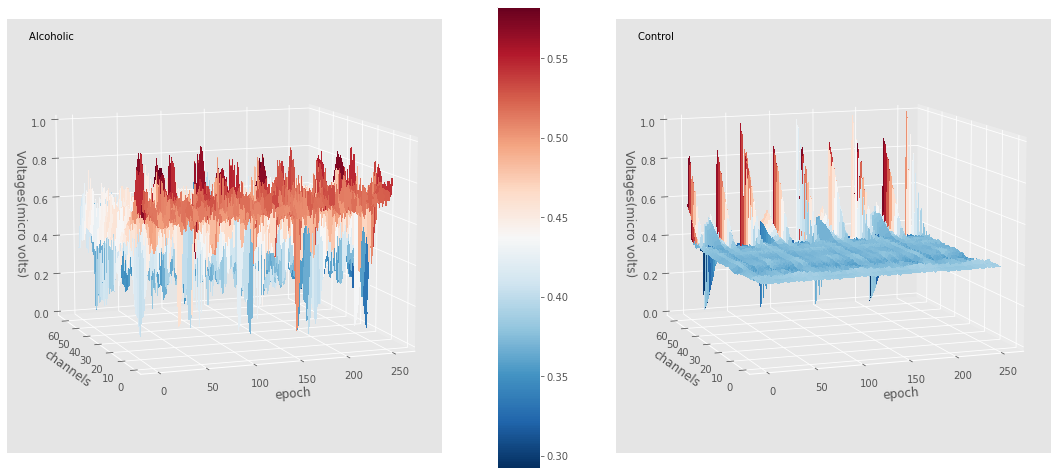

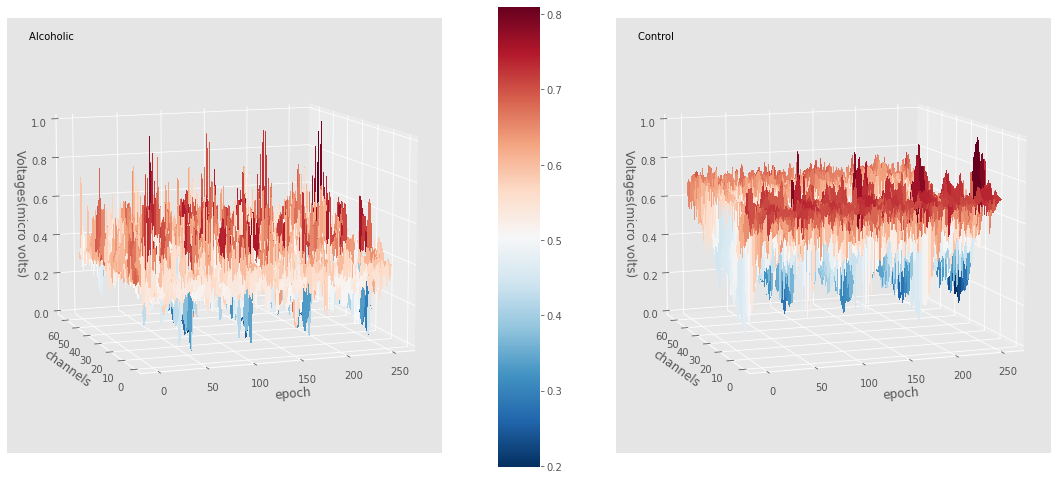

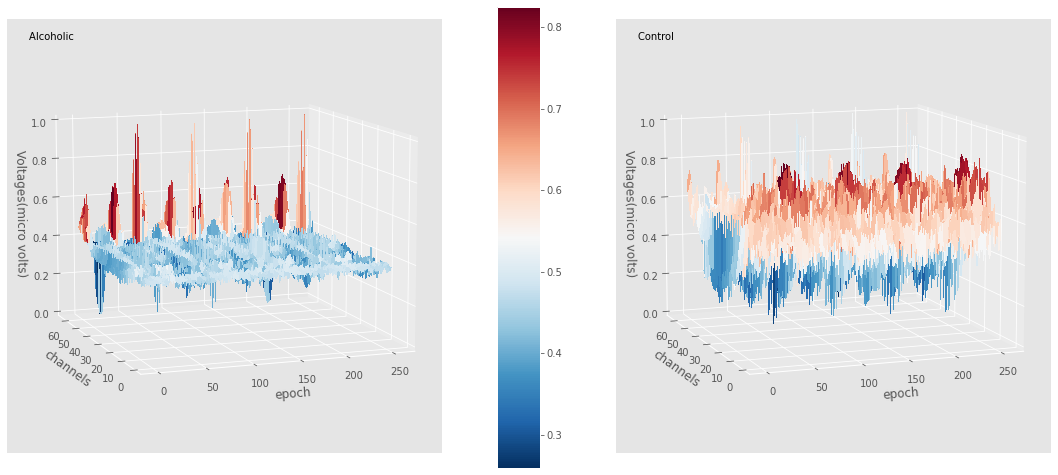

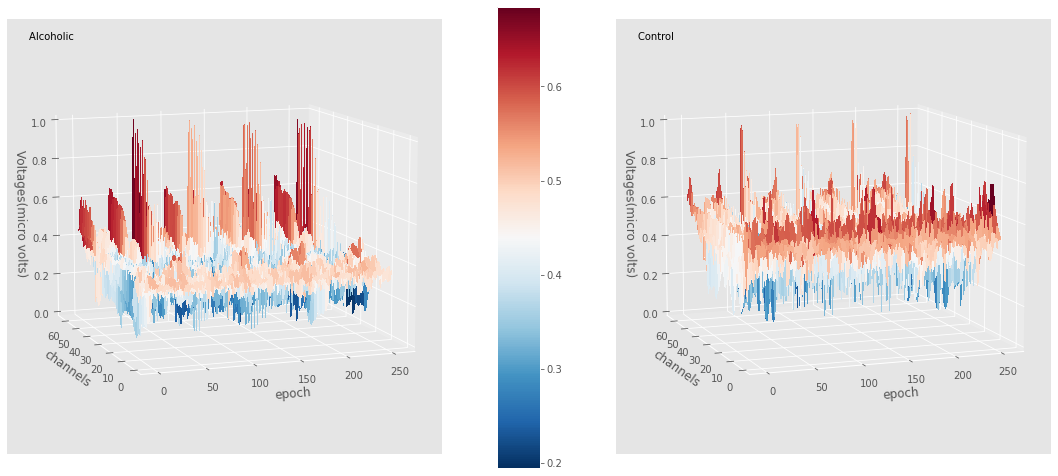

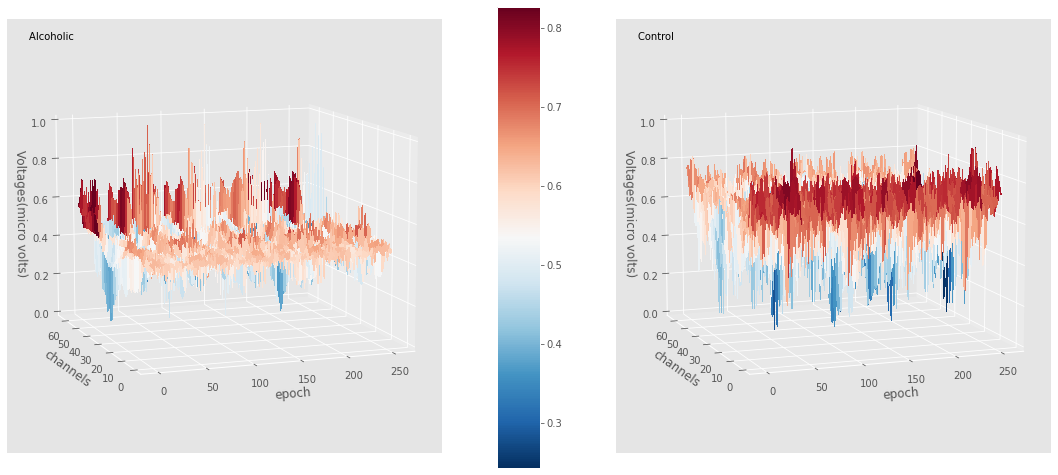

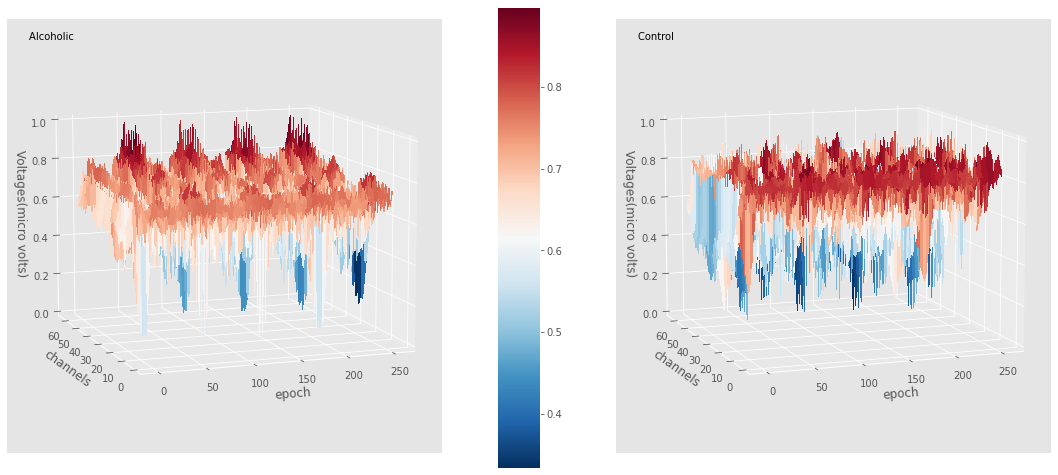

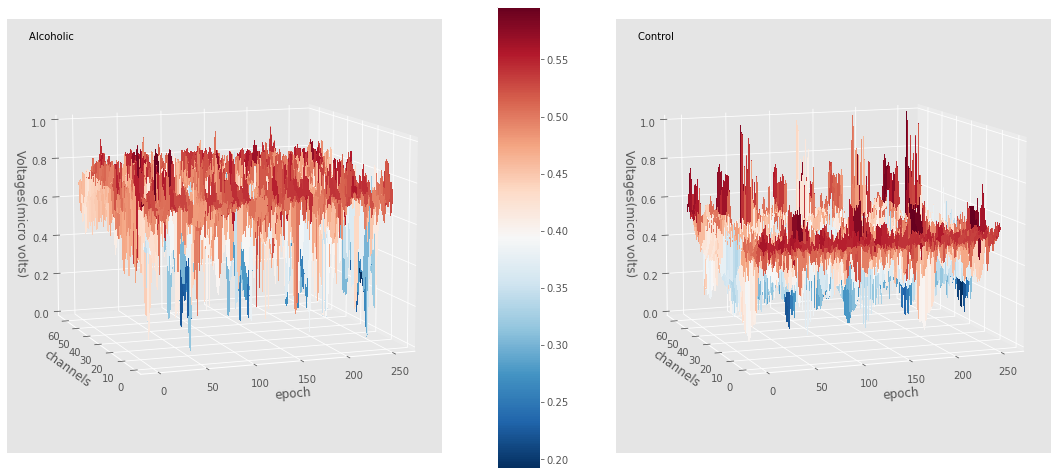

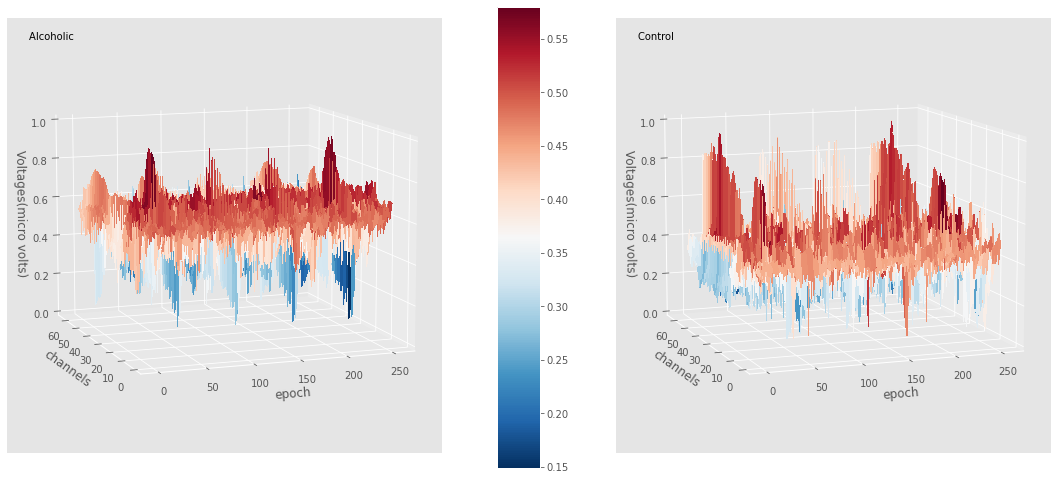

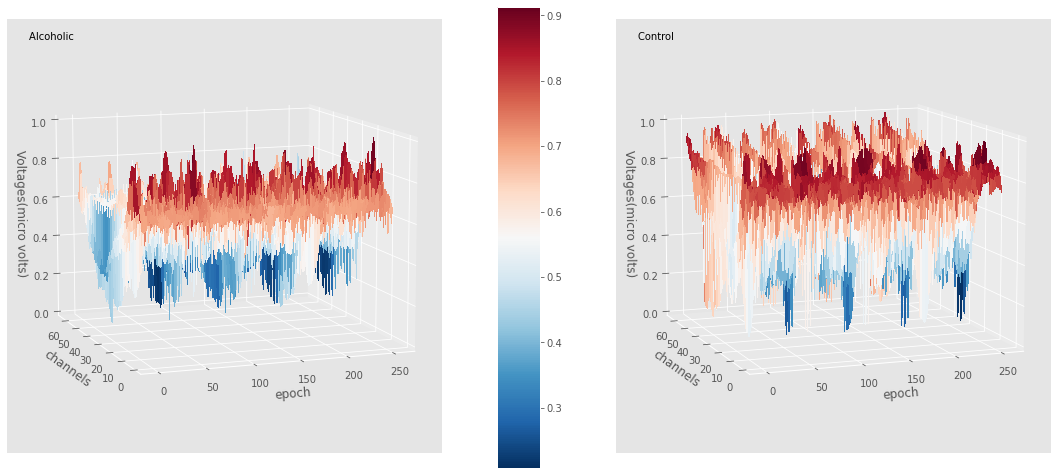

In [113]:
%matplotlib inline

X = np.arange(0, 256, 1)
Y = np.arange(0,64, 1)
for row in range(10):
    Z_al = make_matrix(al_df[al_df['id'] == al_idx[row]],list(set(al_df[al_df['id'] == al_idx[row]].trial))[0])
    Z_co = make_matrix(co_df[co_df['id'] == co_idx[row]],list(set(co_df[co_df['id'] == co_idx[row]].trial))[0])
    Z_al -=Z_al.min()
    Z_al/=Z_al.max()
    Z_co -=Z_co.min()
    Z_co/=Z_co.max()
    make_surface_plot(X,Y,Z_al,Z_co,'')

Text(0.5, 1.0, 'fft')

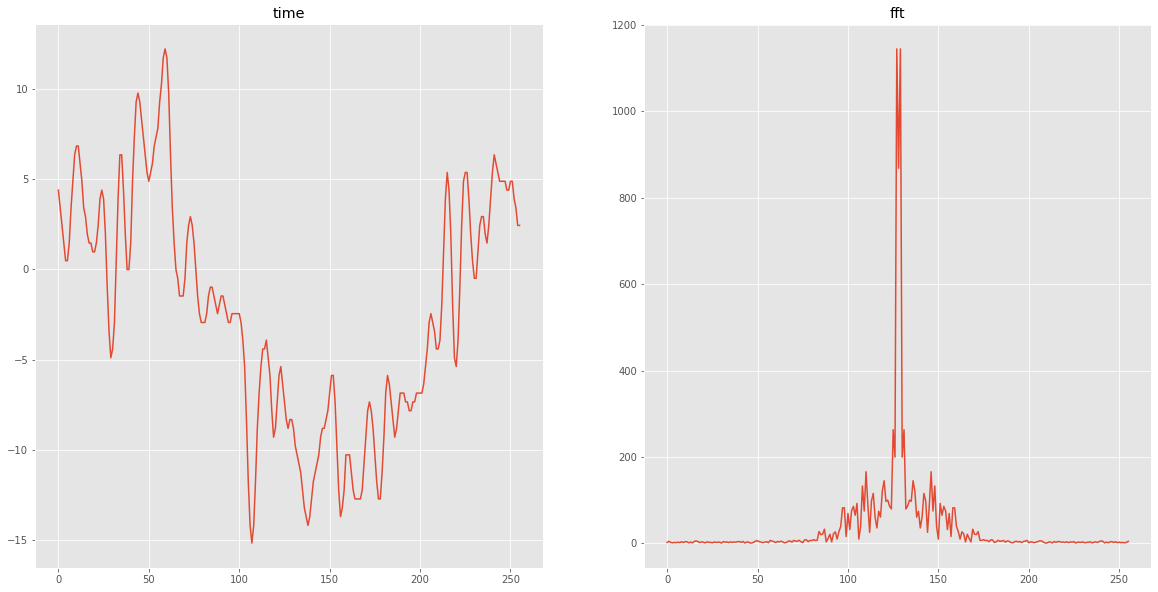

In [166]:
plt.figure(figsize=[20,10])
plt.subplot(121)
plt.plot(a[a.trial==99].AF2.values)
plt.title("time")
a = al_df[al_df['id'] == al_idx[row]]
fft_s = fft.fftshift(fft.fft(a[a.trial==99].AF1.values))
plt.subplot(122)
plt.plot(abs(fft_s))
plt.title("fft")

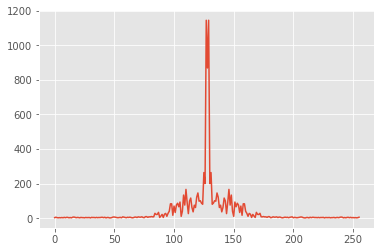

In [159]:
np.where(fft_s==fft_s.max())

(array([127]),)

In [160]:
fft_s[0:110] = 0
fft_s[140:] = 0


In [161]:
s = fft.ifft(fft.ifftshift(fft_s))

/home/kaor/.conda/envs/openmmlab/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'after BPF')

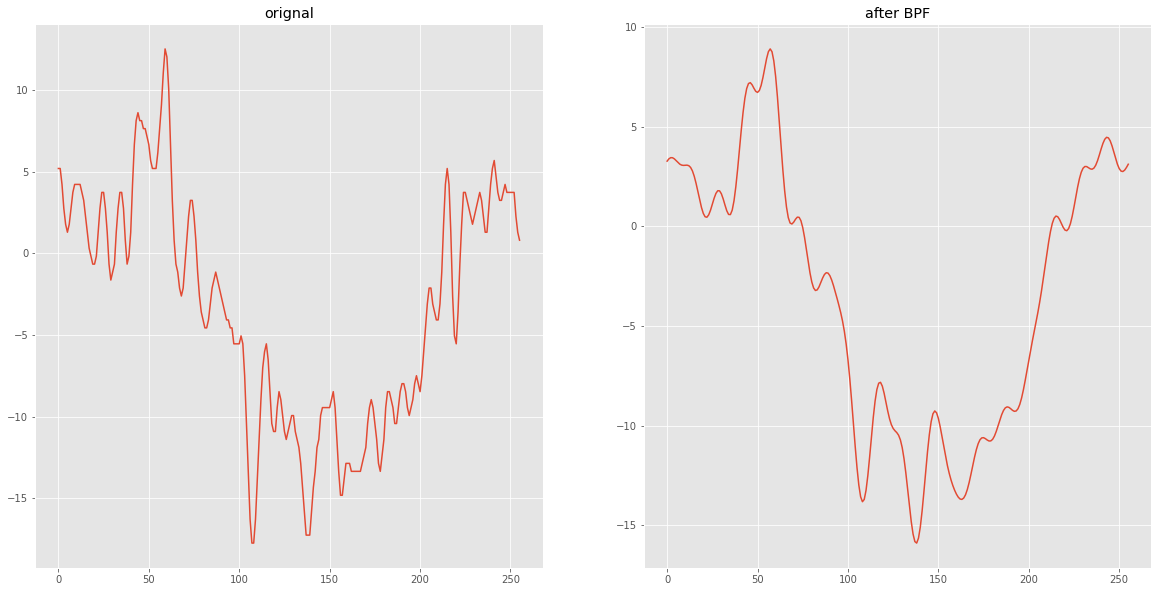

In [165]:
plt.figure(figsize=[20,10])
plt.subplot(121)
plt.plot(a[a.trial==99].AF1.values)
plt.title("orignal")
plt.subplot(122)
plt.plot(s)
plt.title("after BPF")

In [3]:
import pandas as pd
pd.read_parquet("/sise/liorrk-group/OrDanOfir/eeg/data/dataset_SAX_8.parquet").values[:,:64].max()

7